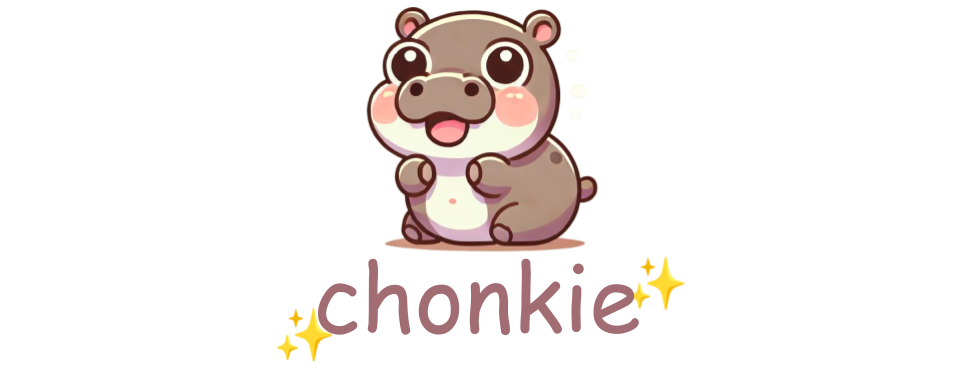


# 🦛 Chonkie: ✨ LLM Chunking Vibe Test 🤖



In this notebook, we must benchmark the ability of different LLMs to chunk the text into semantically coherent, independent pieces of text without much change in their prompting.

To this end, we'll use Chonkie's **`SlumberChunker`** that can interface with Generative LLMs to segment the text into **reconstructable** and **independent** elements.

Additionally, to be able to compare every model with the same interface, we'll be using [Open Router](https://openrouter.ai/)! 🙌 Huge shout-out to the folks who made this possible 😄

**Why no change to their prompting?**

Well, prompting is un-natural advantage given to one LLM over the other. When given tests to students in high-school or college, you don't prompt each student differently to get the answer out, you ask the question as clearly as possible and test their ability to interpret, understand and reason about it effectively. That's why, prompting or prompt-tuning is not done here!

**How to use this notebook?**

You can change the `model` parameter with any of the models with `structured_outputs` on OpenRouter and test `SlumberChunker` to experiment with different models for your use case!

## Installs, Imports, Inits and Utils

In [ ]:
# To use the SlumberChunker, we need the Gemini and OpenAI dependencies!
!pip install -qU "chonkie[gemini, openai]" datasets

In [ ]:
# Importing all the required dependencies
from rich.console import Console

from google.colab import userdata

import chonkie
from chonkie import OpenAIGenie
from chonkie import SlumberChunker
from chonkie import Visualizer

from datasets import load_dataset

print(f"Using chonkie version: {chonkie.__version__}")

In [3]:
# Let's initialize all the components we'll need for this tutorial!

# Initializing a rich console
console = Console(width=88) # width set to 88, because it looks good 😌

# initializing the visualizer
viz = Visualizer()

# setting the OPENROUTER_API_KEY with the help of colab's feature~
OPENROUTER_API_KEY = userdata.get("OPENROUTER_API_KEY")

# Let's set-up our genie to work with OpenRouter
genie = OpenAIGenie(
    model = "cohere/command-r-plus-08-2024",
    base_url = "https://openrouter.ai/api/v1",
    api_key=OPENROUTER_API_KEY
)

# Now, we can use the above genie with the SlumberChunker
chunker = SlumberChunker(
    genie=genie,
    tokenizer_or_token_counter="gpt2",
    chunk_size=1024,
    candidate_size=128,
    min_characters_per_chunk=24,
    return_type="chunks"
)

Awesome~ We now have everything set-up to use the SlumberChunker with OpenRouter!


## Now, let's CHONK some documents!

In [ ]:
# @title Getting some text to chunk!
# Here I am using just a Gemini generated passage on RAG and Importance of Chunking, but you can put in anything else.
text = """Report: Retrieval Augmented Generation (RAG) and the Foundational Importance of Chunking

1. Introduction: The Rise of LLMs and the Need for Augmentation

Large Language Models (LLMs) represent a monumental leap in artificial intelligence, demonstrating remarkable capabilities in understanding and generating human-like text. Trained on vast swathes of internet data, models like GPT-4, Claude 3, Llama 3, and others can draft emails, write code, translate languages, and answer a wide array of general knowledge questions. However, despite their power, LLMs possess inherent limitations that curtail their effectiveness in many real-world applications. Chief among these are their static knowledge base (bound by the cut-off date of their training data), their inability to access private or real-time information, and their propensity to "hallucinate"—generating confident yet factually incorrect or nonsensical statements when faced with queries outside their knowledge scope or when attempting to synthesize information they haven't explicitly learned. Furthermore, their responses often lack traceability, making it difficult to verify the source or accuracy of the information provided.

Retrieval Augmented Generation (RAG) has emerged as a powerful paradigm to address these limitations directly. At its core, RAG enhances the capabilities of LLMs by dynamically grounding their generation process in external, up-to-date, and relevant information retrieved from specified knowledge sources. Instead of relying solely on the model's internalized (and potentially outdated or incomplete) knowledge, RAG first fetches pertinent data snippets related to the user's query and then instructs the LLM to use this retrieved context as the primary basis for formulating its response. This architecture involves two principal components: a Retriever, responsible for searching and fetching relevant information, and a Generator (the LLM itself), which synthesizes the final answer based on the query and the retrieved context.

The effectiveness of any RAG system, however, is profoundly dependent on the quality and relevance of the information retrieved in the first stage. If the retriever fails to find the right information or returns noisy, irrelevant data, the generator LLM cannot produce an accurate or helpful response, regardless of its inherent capabilities. This report argues that the process of chunking—breaking down large documents into smaller, manageable, and semantically meaningful units for indexing and retrieval—is not merely a preliminary data preparation step but arguably the most critical factor influencing retrieval quality. Consequently, mastering chunking strategies is foundational to building robust, reliable, and effective RAG systems. This document provides a comprehensive exploration of the RAG framework and delves deeply into the strategies, challenges, evaluation techniques, and best practices associated with chunking.

2. Understanding Retrieval Augmented Generation (RAG)

To appreciate the significance of chunking, it's essential to first understand the RAG framework in more detail, including the problems it solves, its architecture, workflow, benefits, and inherent challenges.

2.1 The Problem Space: Why RAG is Necessary

Static Knowledge: LLMs are typically trained offline on massive datasets. Their knowledge freezes at the point the training data was collected. They are unaware of events, discoveries, or data generated after this cut-off date.
Lack of Access to Private Data: Standard LLMs cannot access proprietary enterprise knowledge bases, internal documentation, confidential client information, or user-specific data unless explicitly provided in the prompt.
Hallucination: When an LLM lacks specific information or encounters ambiguity, it may generate plausible but factually incorrect statements. This erodes user trust and can be detrimental in sensitive applications (e.g., medical or financial advice).
Limited Traceability: Responses generated solely from the LLM's internal knowledge offer no direct way to verify the information's source or factual basis.
RAG directly targets these issues by connecting the LLM to external, verifiable knowledge sources at query time.

2.2 The RAG Architecture

A typical RAG system comprises two main stages:

Retriever: This component is responsible for finding and fetching relevant context from a specified knowledge source (e.g., a collection of documents, a database, web pages). Modern retrievers often work as follows:
Indexing: The knowledge source (e.g., documents) is pre-processed, often chunked into smaller pieces. Each piece is then converted into a numerical representation called a vector embedding using an embedding model. These vectors, which capture the semantic meaning of the text chunks, are stored in a specialized database optimized for fast similarity searches, known as a vector database or index.
Retrieval: When a user query arrives, it is also converted into a vector embedding using the same embedding model. The retriever then searches the vector database to find the chunk embeddings that are closest (most semantically similar) to the query embedding, typically using algorithms like cosine similarity or dot product search. The corresponding text chunks are then retrieved.
Generator: This is the LLM itself. It receives the original user query and the retrieved text chunks as augmented context. The LLM is then prompted (using carefully crafted instructions) to synthesize a final answer based primarily on the provided context, while leveraging its general language understanding and reasoning abilities.
2.3 The RAG Workflow

A standard RAG query process follows these steps:

Query Input: The user submits a query.
Query Embedding: The query is transformed into a vector embedding.
Similarity Search: The retriever searches the vector index for chunk embeddings similar to the query embedding.
Context Retrieval: The top-k most similar text chunks are retrieved.
Context Augmentation: The retrieved chunks are combined with the original query, often formatted into a specific prompt structure.
Generation: The augmented prompt is fed to the LLM, which generates the response.
Output: The final response is presented to the user, potentially along with references to the source chunks.
2.4 Benefits of RAG

Implementing RAG offers significant advantages:

Enhanced Accuracy & Reduced Hallucination: By grounding responses in retrieved evidence, RAG significantly reduces the likelihood of factual errors and fabrications.
Access to Current & Proprietary Information: RAG allows LLMs to leverage up-to-date information and private knowledge bases without retraining.
Traceability & Verifiability: Responses can often be linked back to the specific source documents/chunks used, allowing users to verify the information.
Cost-Effective Knowledge Updates: Updating the knowledge base involves updating the index, which is typically far less resource-intensive than retraining a massive LLM.
Improved User Trust: Verifiable, accurate, and up-to-date answers build user confidence in the system.
2.5 Challenges and Limitations of RAG

Despite its benefits, RAG systems introduce their own set of challenges:

Retrieval Quality: This is often the Achilles' heel. If the retriever fails to find the truly relevant chunks or retrieves irrelevant/misleading ones (the "needle in a haystack" problem), the generator receives poor context, leading to suboptimal or incorrect answers. Achieving high precision (retrieving only relevant chunks) and high recall (retrieving all relevant chunks) simultaneously is difficult. (Risk Mitigation Consideration: Requires careful chunking, powerful embedding models, potentially re-ranking retrieved results, and continuous evaluation).
Latency: The retrieval step adds processing time compared to a direct LLM call. Searching large vector databases can introduce noticeable delays, impacting user experience in real-time applications. (Risk Mitigation Consideration: Optimize indexing strategies, use efficient vector databases, explore caching mechanisms for common queries, potentially use faster, less accurate retrieval followed by re-ranking).
Cost: RAG introduces costs associated with embedding generation (API calls or self-hosted model compute), vector storage, similarity search computation, and potentially increased LLM costs due to processing larger augmented prompts. (Risk Mitigation Consideration: Choose cost-effective embedding models, optimize indexing, explore techniques like scalar quantization for vector storage, balance retrieval depth (k) with cost/latency).
Implementation Complexity: Setting up and maintaining a RAG pipeline requires expertise across information retrieval, vector databases, embedding models, LLM prompting, and system integration. It's significantly more complex than using a standalone LLM.
Evaluation Complexity: Evaluating a RAG system requires assessing both the retriever's performance (Did it find the right chunks?) and the generator's performance (Did it use the chunks correctly to generate a good answer?). This often requires multi-faceted evaluation frameworks (e.g., RAGAs, ARES) and potentially human judgment.
3. The Indispensable Role of Chunking in RAG

Given that retrieval quality is paramount, we must examine the factors that influence it. Among the most critical is how the source information is prepared for indexing—the process of chunking.

3.1 What is Chunking?

Chunking, in the context of RAG, is the process of segmenting large documents or continuous text streams into smaller, discrete blocks or "chunks." These chunks become the fundamental units that are individually embedded, indexed, and retrieved by the RAG system.

3.2 Why is Chunking Necessary?

Chunking is not an optional pre-processing step; it is a fundamental necessity driven by several factors:

LLM Context Window Limits: LLMs have a finite limit on the amount of text (context window, measured in tokens) they can process at once. This limit varies (from a few thousand to potentially hundreds of thousands of tokens in newer models) but is almost always insufficient to accommodate entire large documents (e.g., lengthy reports, books, extensive logs). Chunking ensures that the retrieved information fits within the LLM's operational limits.
Retrieval Effectiveness: Performing semantic search on entire documents is often ineffective. A long document might cover multiple distinct topics or sub-topics. Its overall embedding might average out these nuances, making it a poor match for a specific query targeting a small detail within the document. Chunking allows the system to embed and retrieve more focused, granular pieces of information, dramatically increasing the likelihood of finding the specific passage relevant to the user's query.
Computational Efficiency: Indexing and searching over smaller, numerous chunks is generally more computationally manageable and faster than trying to process and search massive, monolithic documents. Vector databases are optimized for searching over large quantities of relatively small vectors.
3.3 The Direct Impact of Chunking on RAG Performance

The strategy used for chunking directly and profoundly impacts the entire RAG pipeline:

Impact on Retrieval:
Chunk Size: Too large, and chunks may contain irrelevant information alongside the relevant parts, adding noise to the retrieval and potentially diluting the context. They might also still exceed context window limits if multiple large chunks are retrieved. Too small, and chunks may lack sufficient context to be interpretable or fully answer the query, even if technically relevant (e.g., retrieving just a clause of a sentence).
Chunk Boundaries: Arbitrary splits (like naive fixed-size chunking) can sever related ideas, sentences, or data points, making it impossible to retrieve a complete piece of information. Semantically meaningful boundaries are crucial.
Impact on Generation:
The set of retrieved chunks forms the context the LLM uses to generate its answer. If the retrieved context is fragmented, incomplete, noisy, or irrelevant due to poor chunking, the LLM's generated answer will likely be flawed, inaccurate, or nonsensical, regardless of the LLM's inherent power. The principle of "garbage in, garbage out" applies forcefully here.
Therefore, selecting and tuning an appropriate chunking strategy is paramount for RAG success.

4. Deep Dive into Chunking Strategies

There is no single "best" chunking strategy; the optimal choice depends heavily on the data, the application, and the resources available. Here's a detailed look at common strategies:

4.1 Fixed-Size Chunking

Mechanism: The simplest approach. Text is split into segments of a fixed number of characters or, more commonly, tokens (as LLMs operate on tokens).
Overlap: To mitigate the issue of cutting off context abruptly at chunk boundaries, an overlap is typically introduced. A portion of text from the end of one chunk is repeated at the beginning of the next (e.g., 10-20% overlap). This increases the chance that a complete semantic unit (like a sentence) relevant to a query exists entirely within at least one chunk.
Pros: Easy to implement, predictable chunk sizes (useful for managing context windows), doesn't rely on document structure.
Cons: Ignores semantic content and document structure entirely. Can awkwardly split sentences, paragraphs, code blocks, or logical arguments. May require significant overlap (increasing redundancy and storage) to compensate for boundary issues. Often leads to suboptimal semantic coherence within chunks.
When to Consider: As a baseline, for unstructured or poorly formatted text where structure detection is unreliable, or when simplicity is paramount.
4.2 Content-Aware Chunking (Structure-Based)

Mechanism: Leverages the inherent structure of the document. Splits occur based on structural elements like paragraphs (e.g., splitting by double newlines \n\n), sections (using headings identified via Markdown # or HTML <h1>, <h2> tags), list items, table boundaries, or code blocks.
Pros: Respects the logical organization of the content, leading to chunks that are often more semantically coherent and complete. Can capture units like entire paragraphs or sections effectively.
Cons: Highly dependent on the quality and consistency of the document formatting. Requires robust parsing logic (e.g., using libraries for Markdown, HTML, PDF parsing). Can result in highly variable chunk sizes; some paragraphs might be very short, others very long, potentially exceeding desired limits. Handling complex nested structures can be challenging.
When to Consider: Well-structured documents (HTML, Markdown, LaTeX, structured PDFs), technical manuals, articles where semantic units align well with structural elements.
4.3 Sentence Splitting

Mechanism: Uses Natural Language Processing (NLP) libraries (like NLTK, spaCy, or specialized sentence boundary detection models) to segment the text accurately into individual sentences. Each sentence, or sometimes a small group of consecutive sentences, becomes a chunk.
Pros: Preserves the grammatical integrity of sentences, the fundamental units of meaning. Can be effective for retrieving specific facts or answers contained within a single sentence.
Cons: Often creates very small chunks that lack sufficient surrounding context for the LLM to understand the broader meaning or relationship to the query. Can lead to retrieving many small, potentially relevant but disconnected snippets, increasing noise and making synthesis harder for the LLM. Less effective for queries requiring understanding of relationships across sentences or paragraphs.
When to Consider: Applications focused on factoid extraction, simple Q&A where answers are typically concise, or as a base unit for more complex semantic grouping strategies.
4.4 Recursive Chunking

Mechanism: A more adaptive approach that attempts to preserve larger coherent blocks first. It works by recursively splitting text using a predefined hierarchy of separators. For example, it might first try to split by paragraphs (\n\n). If any resulting chunks are still too large, it splits those chunks by sentences (.), then perhaps by smaller delimiters like commas or spaces, until all chunks are below the target size limit.
Pros: Often achieves a good balance between respecting semantic structure (by trying paragraph/sentence splits first) and maintaining control over chunk size. More robust to variations in document formatting than simple structure-based methods. Generally yields more coherent chunks than fixed-size splitting.
Cons: The effectiveness depends on choosing an appropriate hierarchy of separators relevant to the data. Can still sometimes result in awkward splits if the defined separators don't align well with the semantic flow of a particular document. Requires careful tuning of the separator list and size limits.
When to Consider: A strong general-purpose strategy, often recommended as a starting point for many types of textual data due to its adaptability.
4.5 Semantic Chunking

Mechanism: Moves beyond structure and size rules to group text based purely on semantic meaning. One common approach involves:
Splitting the text into smaller initial units (e.g., sentences).
Calculating vector embeddings for each unit.
Iterating through the units and measuring the semantic similarity (e.g., cosine similarity between embeddings) of adjacent units or groups of units.
Introducing chunk breaks where the semantic similarity drops significantly, indicating a shift in topic. The goal is to group related sentences together into a single chunk.
Pros: Aims to create chunks that represent coherent semantic units, regardless of length or document structure. Potentially yields the most relevant chunks for semantic retrieval, especially in dense or poorly structured text.
Cons: Computationally more expensive and slower during the indexing phase due to the need for embedding calculations and similarity comparisons to determine boundaries. The quality is highly dependent on the chosen embedding model and the effectiveness of the similarity threshold or algorithm used to detect topic shifts. Tuning these parameters can be complex.
When to Consider: High-value datasets where maximizing retrieval relevance is critical, particularly for dense prose or documents lacking clear structural separators. When computational resources for indexing are less constrained.
4.6 Agentic Chunking

Mechanism: The most advanced (and currently experimental) approach. It involves using a powerful LLM itself to analyze the document and decide on the optimal chunking strategy or boundaries. The LLM might be prompted to identify logical sections, summarize parts, or break down the text based on its understanding of the content and potential user queries.
Pros: Theoretically capable of achieving the most semantically meaningful and contextually relevant chunks by leveraging the LLM's deep understanding. Can adapt dynamically to highly variable content.
Cons: Extremely computationally expensive and slow due to multiple LLM calls during indexing. Adds significant complexity to the pipeline. The LLM's chunking decisions might be inconsistent or prone to errors. High cost may make it impractical for large datasets.
When to Consider: Highly experimental settings, research projects, or situations involving extremely valuable data where the potential quality improvement justifies the significant cost and complexity.

Conceptual Strategy Comparison:

Strategy	Primary Basis	Coherence	Size Control	Complexity	Cost (Indexing)	Best For
Fixed-Size	Length	Low	High	Low	Low	Baseline, unstructured text, simplicity needed
Content-Aware	Document Structure	Medium	Variable	Medium	Low-Medium	Well-structured docs (HTML, MD), manuals
Sentence Splitting	Grammar	Low	Low	Medium	Low	Factoid Q&A, simple statements
Recursive	Structure Hierarchy	Medium-High	Medium-High	Medium	Low	General purpose, mixed structure, good starting point
Semantic	Meaning Similarity	High	Variable	High	High	Dense prose, maximizing relevance, unstructured text
Agentic	LLM Understanding	Very High	Variable	Very High	Very High	Experimental, highest value data, complex content

Export to Sheets
5. Choosing and Tuning Chunking Parameters

Selecting the right strategy is only the first step; tuning its parameters, primarily chunk size and overlap (where applicable), is crucial.

5.1 Key Parameters

Chunk Size: Typically measured in tokens. Determines the amount of information in each retrievable unit.
Chunk Overlap: The number of tokens shared between consecutive chunks (for strategies like fixed-size or recursive). Helps ensure semantic units aren't completely severed by a boundary.
5.2 Factors Influencing Choice

The optimal parameters are highly context-dependent:

Document Characteristics: Are documents dense with information or sparse? Is the language complex? Are there many short paragraphs or long, winding ones? Code requires different handling than prose.
Embedding Model Properties: Embedding models often have optimal input lengths. Chunking significantly above this length can lead to less effective embeddings. Some models handle longer contexts better than others.
LLM Context Window: The total size of all retrieved chunks, plus the query and prompt overhead, must fit within the generator LLM's context window. This imposes a hard upper bound.
Task Requirements: Queries seeking specific facts might benefit from smaller, precise chunks. Queries requiring summarization or understanding complex relationships might need larger chunks with more context. Conversational agents might need a balance.
Retrieval Goals: If high recall (finding all relevant info) is critical, slightly larger chunks or more overlap might be needed. If high precision (avoiding noise) is key, smaller, more focused chunks might be better.
Computational Budget: Larger chunks mean fewer vectors to store and potentially faster retrieval search (fewer items to compare), but might increase LLM processing time. Overlap increases the total number of chunks and storage requirements.
5.3 Methodology for Tuning

Finding the optimal settings is typically an empirical and iterative process:

Establish Baselines: Start with a reasonable heuristic based on the chosen strategy, embedding model limits (e.g., chunk size ~80% of model max input), and data type (e.g., recursive for general text).
Create Evaluation Set: Curate a representative set of documents and realistic user queries with known-good answers or relevant passages identified (the "ground truth").
Experiment Systematically: Vary chunking strategies and parameters (size, overlap). Index the evaluation documents using each configuration.
Evaluate Performance: Run the evaluation queries against each indexed configuration. Measure both retrieval performance (e.g., precision@k, recall@k, MRR) and end-to-end RAG quality (e.g., answer relevance, faithfulness using frameworks like RAGAs, or human evaluation).
Analyze and Refine: Compare results across configurations. Identify which settings yield the best balance of retrieval accuracy, generation quality, latency, and cost for the specific use case. Refine parameters based on these findings. This cycle may need repeating.
6. Evaluation of Chunking Effectiveness

Evaluating chunking directly can be challenging, as its impact is often measured through the performance of the downstream retrieval and generation tasks. However, considering both direct and indirect evaluation is beneficial.

6.1 Indirect Evaluation (via RAG Pipeline Performance)

This is the most common approach:

Retrieval Metrics: Assess how well the retriever finds the ground truth relevant chunks for the evaluation queries. Key metrics include:
Precision@k: Proportion of retrieved chunks (top k) that are relevant.
Recall@k: Proportion of all relevant chunks (in the ground truth) that are found within the top k retrieved.
Mean Reciprocal Rank (MRR): Measures the rank of the first relevant retrieved item, averaged over queries. Good for Q&A where finding one correct answer quickly matters.
Generation Metrics: Evaluate the quality of the final answer generated by the LLM based on the retrieved chunks.
Faithfulness/Groundedness: Does the answer accurately reflect the information in the retrieved context? Does it avoid contradicting the sources?
Answer Relevance: How well does the generated answer address the user's query?
Frameworks: Tools like RAGAs, ARES provide automated metrics for these aspects.
Human Evaluation: Often the gold standard for assessing nuanced aspects of answer quality, coherence, and helpfulness.
6.2 Direct (Intrinsic) Chunk Evaluation

While less common and harder to standardize, attempts can be made to assess chunk quality directly:

Coherence Analysis: Measure the semantic consistency within each chunk. For example, calculate the average cosine similarity between embeddings of sentences within a chunk. Higher scores suggest more coherent chunks.
Separation Analysis: Measure the semantic distinctness between adjacent chunks. Calculate the similarity between the end of one chunk and the beginning of the next. Lower scores might indicate well-placed boundaries corresponding to topic shifts.
Chunk Size Distribution: Analyze the histogram of chunk sizes. Are they excessively variable? Are there too many very small or very large chunks? Does the distribution align with expectations for the chosen strategy?
Qualitative Manual Inspection: Sample a subset of chunks and manually review them. Do they make sense as standalone units? Are sentences or ideas awkwardly split? Does the chunk seem focused on a single topic?
6.3 Holistic View

Ultimately, chunking should be evaluated as part of the entire RAG system. A chunking strategy might look good on intrinsic metrics but perform poorly if it interacts negatively with the specific embedding model or the way the LLM synthesizes information. An iterative approach evaluating the full pipeline is essential.

7. Chunking and Embeddings: A Symbiotic Relationship

Chunking and embedding models are deeply intertwined. The choice and effectiveness of one directly influence the other.

Embedding Quality Depends on Chunk Quality: Embedding models work best when encoding clear, coherent semantic units. Well-chunked text, where each chunk focuses on a specific topic or sub-topic, leads to more distinct and representative vector embeddings. Conversely, chunks containing a jumble of unrelated ideas or awkwardly split sentences will result in noisy, less useful embeddings, hindering retrieval accuracy.
Chunking Strategy Should Consider Embedding Model: Different embedding models have different strengths, weaknesses, and optimal input lengths. For instance, some models (like many sentence transformers) perform best on sentence-to-paragraph length inputs. Others might be designed to handle longer contexts. The chunking strategy should aim to produce chunks whose size and structure align well with the capabilities of the chosen embedding model. Feeding excessively long chunks into a model optimized for shorter text can degrade embedding quality.
Alignment is Key: Achieving optimal performance requires aligning the chunking strategy (how text is divided), the embedding model (how meaning is encoded), and the downstream LLM (how context is utilized). Mismatches at any stage can bottleneck the entire system. For example, using very small sentence chunks might not leverage the full contextual understanding of a powerful embedding model designed for paragraphs.
8. Metadata: The Unsung Hero of Chunking

Effective chunking isn't just about splitting text; it's also about preserving vital information about each chunk through metadata. This metadata is crucial for the usability, traceability, and maintainability of the RAG system.

Why Metadata is Crucial:
Traceability & Verifiability: Allows the system (and users) to identify the source of information used in the generated response.
Debugging: Helps pinpoint issues by examining the source of problematic chunks.
Filtering: Enables pre-retrieval filtering (e.g., only retrieve chunks from documents created after a certain date or from specific sections).
Hybrid Search: Can be used alongside vector similarity for combined keyword/semantic searches.
User Experience: Displaying source information builds trust.
Essential Metadata Fields: While the exact schema can vary, essential fields typically include:
chunk_id: A unique identifier for this specific chunk.
source_document_id: Identifier linking back to the original document (e.g., filename, database ID).
text: The actual content of the chunk.
start_char_index / end_char_index: Character offsets indicating the chunk's position within the original document (useful for highlighting or retrieving surrounding context).
page_number: If applicable (e.g., for PDFs).
section_heading: The heading of the section the chunk belongs to, if available.
Optional but useful: document_title, author, creation_date, document_type, specific tags or keywords associated with the document.
Justification: Each field serves a purpose. source_document_id and positional info enable traceability. Timestamps allow temporal filtering. Structural info like headings can provide context or enable structured retrieval.
Storage: Metadata is typically stored alongside the vector embeddings in the vector database (if supported) or in a separate linked database (e.g., a relational DB mapping chunk IDs to metadata).
Neglecting metadata significantly diminishes the value and trustworthiness of a RAG system.

9. Handling Edge Cases and Challenges in Chunking

Real-world data is often messy. A robust chunking pipeline needs strategies to handle common issues:

Poorly Formatted Documents: Text extracted from PDFs or scanned documents can contain strange line breaks, merged words, or OCR errors. Pre-processing steps are vital: text cleaning routines (removing excess whitespace, correcting common OCR errors), potentially using layout-aware models (like LayoutLM) to better understand structure before chunking. If parsing fails, the system might fall back to a simpler strategy like fixed-size chunking for that document.
Tables and Figures: Standard text chunking often butchers tables. Specialized table extraction tools are needed to parse table structures into formats like CSV or JSON, which can then be embedded or represented textually (e.g., as a serialized description). Figures might require image captioning or multimodal embedding models that can process both text and images.
Mixed Languages: Documents might contain multiple languages. Language detection libraries can identify segments, potentially allowing for language-specific chunking rules or routing to appropriate language-specific embedding models if needed. Multilingual models simplify this but might have varying performance across languages.
Contradictory Information in Retrieval: Chunking itself doesn't resolve contradictions; its job is to accurately represent the source content. If the retriever pulls chunks with conflicting information (which can happen if the source data itself is contradictory or if retrieval isn't perfect), the responsibility falls to the generator stage. The LLM's prompt needs to instruct it on how to handle such cases: e.g., acknowledge the discrepancy, prioritize information based on source reliability or recency (if available in metadata), or explicitly state the conflicting views found in the sources.
Extremely Long Semantic Units: Sometimes a single sentence or paragraph might naturally exceed the desired chunk size limit. Strategies like recursive chunking attempt to handle this gracefully by splitting at the next available delimiter, but careful consideration is needed to avoid losing critical context in such unavoidable splits.
10. RAG vs. Alternatives: A Nuanced View

While RAG is powerful, it's important to understand its relationship with other techniques like fine-tuning.

RAG vs. Fine-Tuning:
Knowledge Integration: RAG injects knowledge dynamically at query time via retrieved context. Fine-tuning bakes knowledge and style into the LLM's parameters during a training process.
Updating Knowledge: RAG excels here; update the knowledge base and index, and the system uses the new information immediately. Fine-tuning requires a new, often costly, training run.
Controlling Hallucinations: RAG provides explicit grounding, making it generally better at reducing factual hallucinations for knowledge-intensive tasks. Fine-tuning might reduce hallucinations related to style or domain understanding but can still fabricate facts if the underlying knowledge isn't in its parameters or the fine-tuning data.
Cost & Complexity: RAG pipeline complexity is significant (retriever, index, generator). Fine-tuning requires expertise in training LLMs and significant upfront compute resources, plus periodic retraining costs. Total Cost of Ownership comparison depends heavily on the scale and update frequency.
Traceability: RAG offers clear links to source data. Fine-tuning makes it hard to trace why the model generated a specific piece of information.
Complementary, Not Mutually Exclusive: Often, the most effective approach combines both. Fine-tuning can adapt an LLM to a specific domain's language, style, and implicit knowledge structures. RAG can then be layered on top to provide dynamic access to specific, up-to-date facts and external documents, grounding the fine-tuned model's responses in verifiable evidence. For instance, fine-tune a model on internal communication styles, then use RAG to answer questions based on the latest project documents.
RAG is particularly advantageous when dealing with large, rapidly changing knowledge bases or when source attribution and factual grounding are critical requirements.

11. Implementation Considerations

Building and deploying a robust RAG system involves several practical considerations beyond choosing a chunking strategy:

Iterative Development: Emphasize that achieving optimal RAG performance is rarely a one-shot process. It requires iterative experimentation involving different chunking approaches, embedding models, retrieval tuning (e.g., adjusting 'k', adding re-ranking), and prompt engineering for the generator LLM.
Resource Requirements: Implementing RAG necessitates:
Compute Resources: For generating embeddings (GPU often beneficial), running the vector database, potentially hosting embedding/LLM models.
Storage: For the original documents, the vector index (which can become very large), and potentially metadata stores.
Specialized Infrastructure: Vector databases (e.g., Pinecone, Weaviate, Chroma, Milvus) or vector search capabilities within existing databases.
Expertise: Skills in NLP, information retrieval, software engineering, MLOps, and potentially specific LLM/vector DB platforms.
Tooling Ecosystem: Frameworks like LangChain and LlamaIndex provide abstractions and pre-built components that can significantly accelerate development, offering various chunking methods, vector store integrations, and RAG pipeline templates. However, understanding the underlying principles remains crucial for effective customization and troubleshooting.
Scalability: Designing for scale involves choosing scalable vector database solutions, optimizing indexing pipelines, potentially implementing distributed embedding generation, and ensuring the retrieval and generation components can handle the expected query load.
12. Conclusion

Retrieval Augmented Generation represents a significant advancement in making Large Language Models more factual, current, and applicable to specific domains by connecting them to external knowledge sources. While the generative power of the LLM often captures the most attention, the success of any RAG system fundamentally hinges on the quality of its retrieval component.

This report has argued and demonstrated that chunking is not a trivial pre-processing task but a foundational pillar determining retrieval effectiveness. The strategies employed to segment documents into indexable units directly impact the relevance, completeness, and noise level of the context provided to the generator LLM. Poor chunking choices inevitably lead to poor retrieval, which in turn cripples the generator's ability to produce accurate and trustworthy responses, undermining the core purpose of RAG.

Mastering chunking requires a deep understanding of the various strategies—from simple fixed-size splits to sophisticated semantic approaches—and their associated trade-offs regarding semantic coherence, size control, computational cost, and implementation complexity. It necessitates careful consideration of document characteristics, embedding model properties, downstream task requirements, and the crucial role of metadata. Furthermore, effective chunking demands an iterative approach involving systematic experimentation, robust evaluation (both direct and indirect), and continuous refinement.

Investing the necessary effort to develop and optimize a suitable chunking strategy is essential for unlocking the full potential of Retrieval Augmented Generation. By ensuring that information is appropriately segmented, indexed, and retrieved, we can build RAG systems that truly augment the capabilities of LLMs, delivering responses that are not only fluent and coherent but also accurate, verifiable, and grounded in relevant evidence.
"""

console.print(text)

In [ ]:
# Let's chunk it to see the chunks!
chunks = chunker(text)
viz(chunks)

In [ ]:
# Let's calculate the cost to chunk per Million tokens
text_cost = 0.00087 # Get this from the OpenRouter Dashboard
total_token_count = sum([c.token_count for c in chunks])
cpm = (text_cost * (1e6/total_token_count))
console.print(f"Dollar Cost per Million Tokens Chunks: ${cpm: .2f}")

# Fin.